In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
from datetime import datetime

ModuleNotFoundError: No module named 'plotly'

In [9]:
covid_df =pd.read_csv("C:/Users/Dell/Desktop/COVID-19 Cases(23-01-2022).csv")

In [10]:
covid_df.head(10)

,S. No.,Date,Region,Confirmed Cases,Cured/Discharged,Death
0,662,22-01-2022,India,38903731,36301482.0,488884.0
1,1309,22-01-2022,Andaman and Nicobar Islands,9164,8519.0,129.0
2,1971,22-01-2022,Andhra Pradesh,2153268,2074600.0,14532.0
3,2611,22-01-2022,Arunachal Pradesh,58803,55861.0,282.0
4,3252,22-01-2022,Assam,684954,632311.0,6275.0
5,3904,22-01-2022,Bihar,805751,770802.0,12173.0
6,4559,22-01-2022,Chandigarh,83735,73378.0,1097.0
7,5213,22-01-2022,Chhattisgarh,1086207,1041746.0,13705.0
8,5817,22-01-2022,Dadra and Nagar Haveli and Daman and Diu,11144,10896.0,4.0
9,6479,22-01-2022,Delhi,1771028,1683533.0,25541.0


In [11]:
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24676 entries, 0 to 24675
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   S. No.            24676 non-null  int64  
 1   Date              24676 non-null  object 
 2   Region            24676 non-null  object 
 3   Confirmed Cases   24676 non-null  int64  
 4   Cured/Discharged  23989 non-null  float64
 5   Death             24675 non-null  float64
dtypes: float64(2), int64(2), object(2)
memory usage: 1.1+ MB


In [12]:
covid_df.describe()

,S. No.,Confirmed Cases,Cured/Discharged,Death
count,24676.000000,2.467600e+04,2.398900e+04,2.467500e+04
mean,12338.500000,4.194019e+06,8.394743e+05,8.268814e+04
std,7123.491957,2.553973e+07,3.385929e+06,5.188771e+05
min,1.000000,0.000000e+00,0.000000e+00,0.000000e+00
25%,6169.750000,9.719750e+03,7.157000e+03,8.300000e+01
50%,12338.500000,1.065195e+05,8.221400e+04,1.185000e+03
75%,18507.250000,6.564785e+05,5.809230e+05,8.210500e+03
max,24676.000000,3.405440e+08,3.630148e+07,5.570163e+06


In [13]:
vaccine_df = pd.read_csv("C:/Users/Dell/Desktop/COVID-19 India Statewise Vaccine Data.csv")

In [14]:
vaccine_df.head(7)

,State/UTs,Total Vaccination Doses,Dose 1,Dose 2,Population
0,Andaman and Nicobar,603110,305835,297275,399001
1,Andhra Pradesh,72479031,40175306,32303725,91702478
2,Arunachal Pradesh,1482168,820568,661600,1711947
3,Assam,38838917,22079443,16759474,35998752
4,Bihar,103155455,59092791,44062664,128500364
5,Chandigarh,1871512,1051497,820015,1158040
6,Chhattisgarh,30948640,18095004,12853636,32199722


In [15]:
covid_df.drop(["S. No."], inplace = True, axis = 1)

In [16]:
covid_df.head()

,Date,Region,Confirmed Cases,Cured/Discharged,Death
0,22-01-2022,India,38903731,36301482.0,488884.0
1,22-01-2022,Andaman and Nicobar Islands,9164,8519.0,129.0
2,22-01-2022,Andhra Pradesh,2153268,2074600.0,14532.0
3,22-01-2022,Arunachal Pradesh,58803,55861.0,282.0
4,22-01-2022,Assam,684954,632311.0,6275.0


In [21]:
# Active cases

covid_df['Active Cases'] = covid_df['Confirmed Cases'] - (covid_df['Cured/Discharged'] + covid_df['Death'])
covid_df.tail()

,Date,Region,Confirmed Cases,Cured/Discharged,Death,Active Cases
24671,01-01-1970,Tripura,84914,84020.0,826.0,68.0
24672,01-01-1970,Uttar Pradesh,1710554,1687497.0,22914.0,143.0
24673,01-01-1970,Uttarakhand,344459,336906.0,7412.0,141.0
24674,01-01-1970,West Bengal,1623191,1596043.0,19600.0,7548.0
24675,01-01-1970,World,245373039,NaN,4979421.0,NaN


In [22]:
statewise = pd.pivot_table(covid_df, values = ["Confirmed Cases", "Death", "Cured/Discharged"], index = "Region", aggfunc = max)

In [23]:
statewise["Recovery Rate"] = statewise["Cured/Discharged"]*100/statewise["Confirmed Cases"]

In [24]:
statewise["Mortality Rate"] = statewise["Death"]*100/statewise["Confirmed Cases"]

In [25]:
statewise = statewise.sort_values(by = "Confirmed Cases", ascending = False)

In [26]:
statewise.style.background_gradient(cmap = "cubehelix")

,Confirmed Cases,Cured/Discharged,Death,Recovery Rate,Mortality Rate
Region,,,,,
World,340543962,nan,5570163.000000,nan,1.635666
India,38903731,36301482.000000,488884.000000,93.311055,1.256651
Maharashtra,7420027,7009823.000000,142023.000000,94.471664,1.914050
Kerala,5552512,5276647.000000,51607.000000,95.031708,0.929435
Karnataka,3425002,3063292.000000,38537.000000,89.439130,1.125167
Tamil Nadu,3072666,2848163.000000,37145.000000,92.693544,1.208885
Andhra Pradesh,2153268,2074600.000000,14532.000000,96.346576,0.674881
West Bengal,1949074,1793993.000000,20265.000000,92.043350,1.039725
Uttar Pradesh,1916616,1797728.000000,23022.000000,93.796984,1.201180


In [27]:
#Top 10 active cases states

top_10_active_cases = covid_df.groupby(by = 'Region').max()[['Active Cases', 'Date']].sort_values(by = ['Active Cases'], ascending = False).reset_index()

In [28]:
fig = plt.figure(figsize=(16,9))

<Figure size 1152x648 with 0 Axes>

Text(0.5, 1.0, 'Top 10 states with most active cases in India')

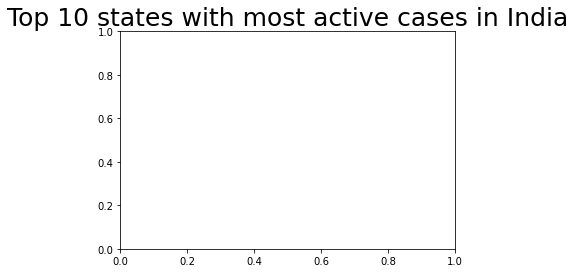

In [29]:
plt.title("Top 10 states with most active cases in India", size = 25)

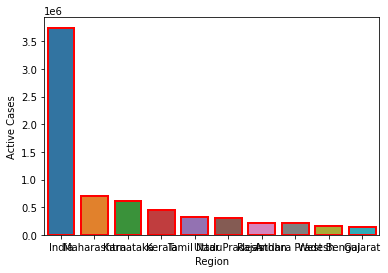

In [30]:
ax = sns.barplot(data = top_10_active_cases.iloc[:10], y = "Active Cases", x = "Region", linewidth = 2, edgecolor = 'red')

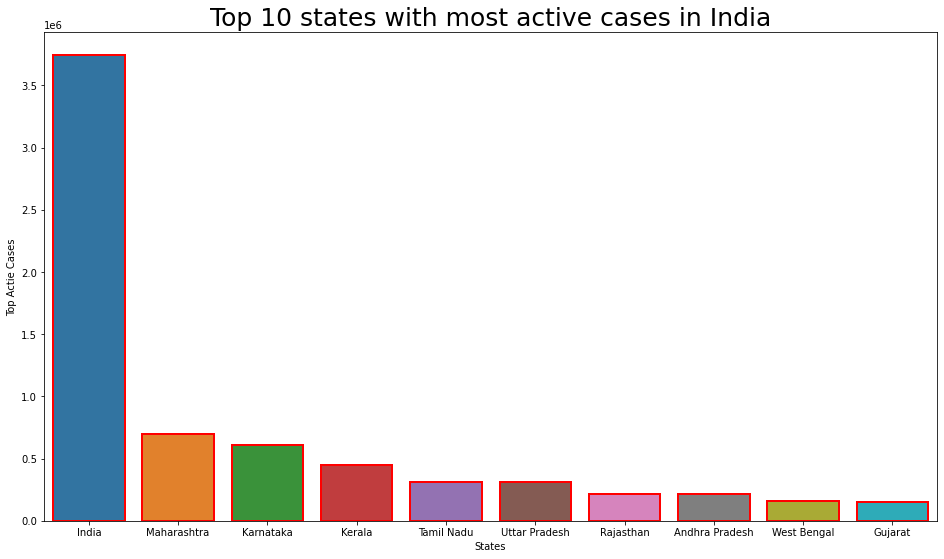

In [31]:
#Top 10 active cases states

top_10_active_cases = covid_df.groupby(by = 'Region').max()[['Active Cases', 'Date']].sort_values(by = ['Active Cases'], ascending = False).reset_index()
fig = plt.figure(figsize=(16,9))
plt.title("Top 10 states with most active cases in India", size = 25)
ax = sns.barplot(data = top_10_active_cases.iloc[:10], y = "Active Cases", x = "Region", linewidth = 2, edgecolor = 'red')
plt.xlabel("States")
plt.ylabel("Top Actie Cases")
plt.show()

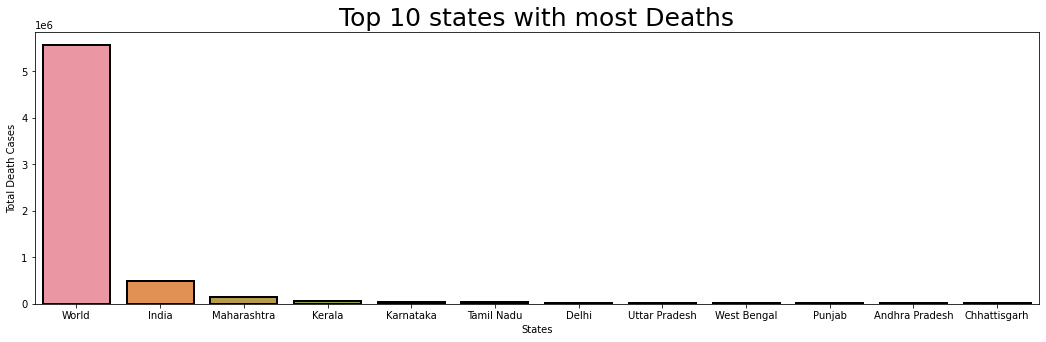

In [33]:
#Top states woth highest deaths

top_10_death = covid_df.groupby(by = 'Region').max()[['Death', 'Date']].sort_values(by = ['Death'],ascending = False).reset_index()
fig = plt.figure(figsize=(18,5))

plt.title("Top 10 states with most Deaths", size = 25)
ax = sns.barplot(data = top_10_death.iloc[:12], y = "Death", x="Region", linewidth = 2, edgecolor = 'black')
plt.xlabel("States")
plt.ylabel("Total Death Cases")
plt.show()

Text(0.5, 1.0, 'Top 5 affected States in India')

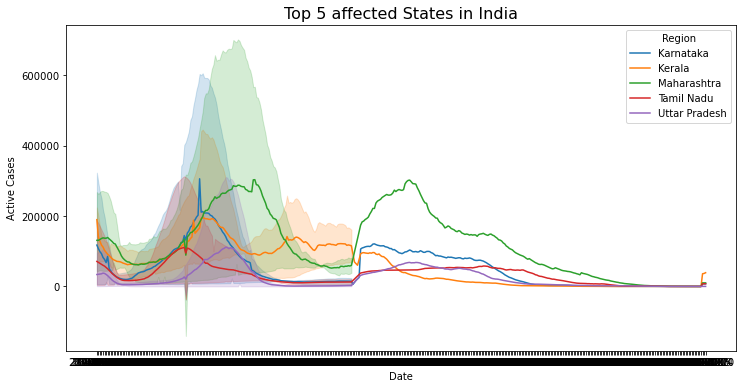

In [37]:
# Growth trend 
fig = plt.figure(figsize = (12,6))
ax = sns.lineplot(data = covid_df[covid_df['Region'].isin(['Maharashtra','Karnataka','Kerala','Tamil Nadu','Uttar Pradesh'])],x = 'Date', y = 'Active Cases',hue = 'Region')
ax.set_title("Top 5 affected States in India", size=16)

In [38]:
vaccine_df.head()

,State/UTs,Total Vaccination Doses,Dose 1,Dose 2,Population
0,Andaman and Nicobar,603110,305835,297275,399001
1,Andhra Pradesh,72479031,40175306,32303725,91702478
2,Arunachal Pradesh,1482168,820568,661600,1711947
3,Assam,38838917,22079443,16759474,35998752
4,Bihar,103155455,59092791,44062664,128500364


In [39]:
vaccine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   State/UTs                36 non-null     object
 1   Total Vaccination Doses  36 non-null     int64 
 2   Dose 1                   36 non-null     int64 
 3   Dose 2                   36 non-null     int64 
 4   Population               36 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 1.5+ KB


In [40]:
vaccine_df.isnull().sum()

State/UTs                  0
Total Vaccination Doses    0
Dose 1                     0
Dose 2                     0
Population                 0
dtype: int64

In [45]:
vaccine_df.rename(columns = {"Total Vaccination Doses": "Total"}, inplace = True)
vaccine_df.head()

,State/UTs,Total,Dose 1,Dose 2,Population
0,Andaman and Nicobar,603110,305835,297275,399001
1,Andhra Pradesh,72479031,40175306,32303725,91702478
2,Arunachal Pradesh,1482168,820568,661600,1711947
3,Assam,38838917,22079443,16759474,35998752
4,Bihar,103155455,59092791,44062664,128500364


In [49]:
#Most vaccinated state
max_vac = vaccine_df.groupby('State/UTs')['Total'].sum().to_frame('Total')
max_vac = max_vac.sort_values('Total',ascending = False)[:5]
max_vac

,Total
State/UTs,
Uttar Pradesh,216527441
Maharashtra,139094636
West Bengal,110043335
Madhya Pradesh,103673772
Bihar,103155455


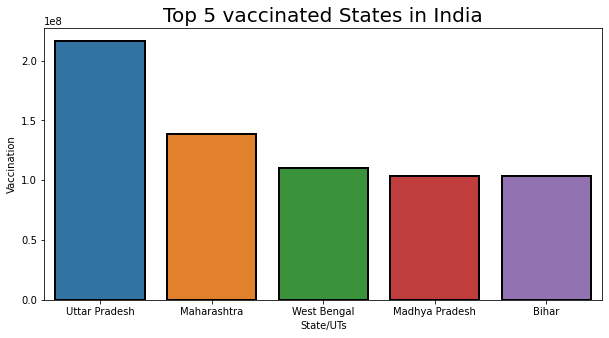

In [50]:
fig = plt.figure(figsize = (10,5))
plt.title("Top 5 vaccinated States in India", size = 20)
x = sns.barplot(data = max_vac.iloc[:10],y = max_vac.Total, x = max_vac.index, linewidth=2, edgecolor='black')
plt.xlabel("State/UTs")
plt.ylabel("Vaccination")
plt.show()